# Unemployment Analysis with **Python**

The project “Unemployment Analysis with Python” focuses on studying the unemployment trends in India, particularly during the Covid-19 pandemic.
The dataset contains information such as:

Date

Region (State)

Estimated Unemployment Rate (%)

Estimated Employed Population

Estimated Labour Participation Rate

Using Python libraries like Pandas, Matplotlib, and Seaborn, we performed data cleaning, exploration, and visualization to understand how unemployment rates changed over time and across different regions.

# Data Cleaning & **Preparation**

The dataset was first loaded using pandas.read_csv().

Missing values were checked and handled.

Column names were renamed for easier understanding.

The Date column was converted into a proper datetime format to perform time-based analysis.

After cleaning, the data was ready for visualization and analysis.

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/Unemployment in India.csv')

In [3]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [4]:
df.shape

(768, 7)

In [5]:
df.isnull().sum()

,0
Region,28
Date,28
Frequency,28
Estimated Unemployment Rate (%),28
Estimated Employed,28
Estimated Labour Participation Rate (%),28
Area,28


In [6]:
df=df.dropna()

In [7]:
df.isnull().sum()

,0
Region,0
Date,0
Frequency,0
Estimated Unemployment Rate (%),0
Estimated Employed,0
Estimated Labour Participation Rate (%),0
Area,0


In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 46.2+ KB


In [37]:
df.columns = df.columns.str.strip()
df.columns = ['Region', 'Date', 'Frequency', 'Estimated_Unemployment_Rate', 'Estimated_Employed', 'Estimated_Labour_Participation_Rate','Area']

In [40]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [19]:
df.describe()

,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740,740.000000,7.400000e+02,740.000000
mean,2019-12-12 18:36:58.378378496,11.787946,7.204460e+06,42.630122
min,2019-05-31 00:00:00,0.000000,4.942000e+04,13.330000
25%,2019-08-31 00:00:00,4.657500,1.190404e+06,38.062500
50%,2019-11-30 00:00:00,8.350000,4.744178e+06,41.160000
75%,2020-03-31 00:00:00,15.887500,1.127549e+07,45.505000
max,2020-06-30 00:00:00,76.740000,4.577751e+07,72.570000
std,NaN,10.721298,8.087988e+06,8.111094


In [28]:
df['Area'].value_counts()


,count
Area,
Urban,381
Rural,359


# Exploratory Data Analysis (EDA)

<Axes: xlabel='Area', ylabel='count'>

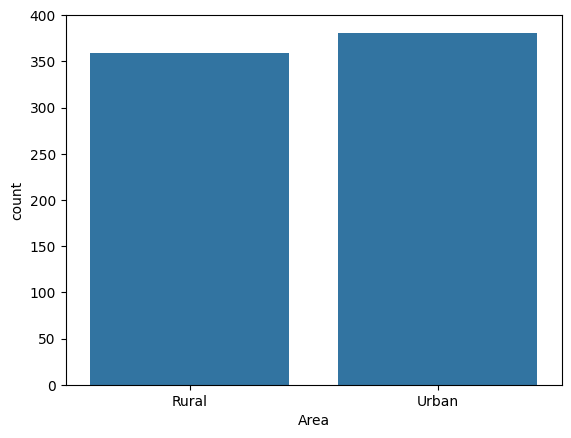

In [29]:
sns.countplot(x=df['Area'])

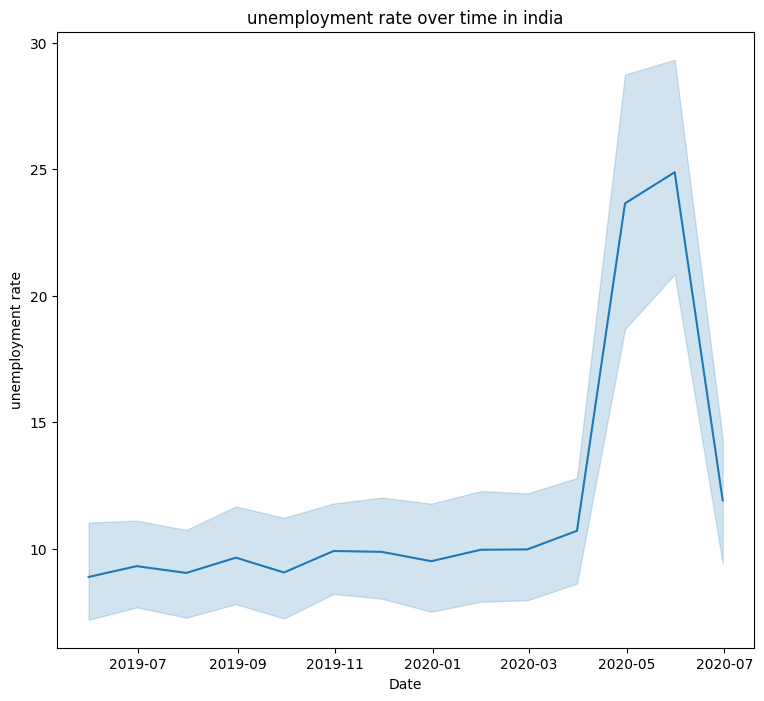

In [42]:
plt.figure(figsize=(9,8))
sns.lineplot(x=df['Date'],y=df['Estimated_Unemployment_Rate'])
plt.title('unemployment rate over time in india')
plt.xlabel('Date')
plt.ylabel('unemployment rate')
plt.show()


Text(0, 0.5, 'unemployment rate')

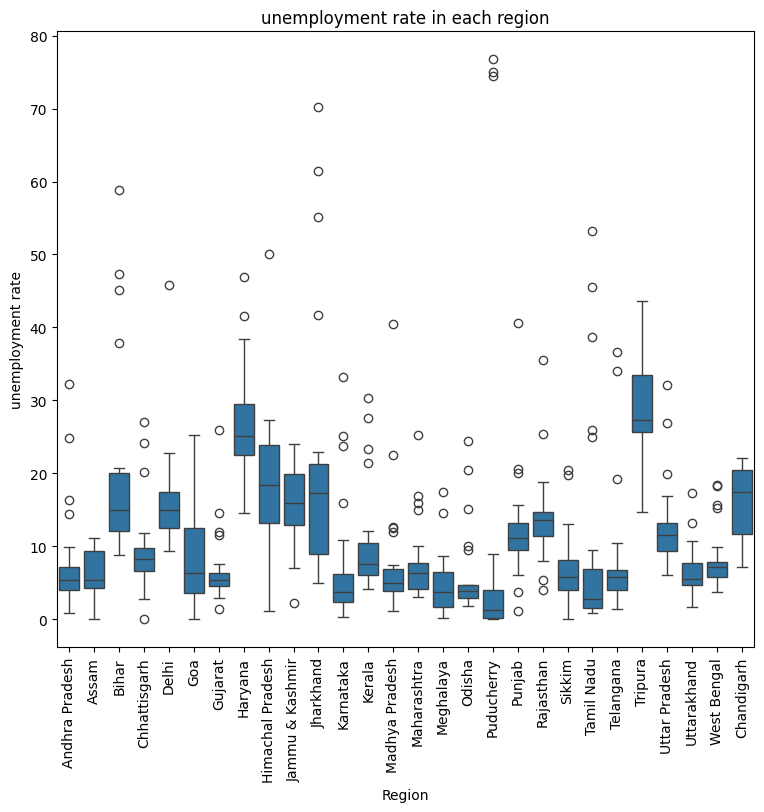

In [45]:
plt.figure(figsize=(9,8))
sns.boxplot(x=df['Region'],y=df['Estimated_Unemployment_Rate'])
plt.xticks(rotation=90)

plt.title('unemployment rate in each region')
plt.xlabel('Region')
plt.ylabel('unemployment rate')

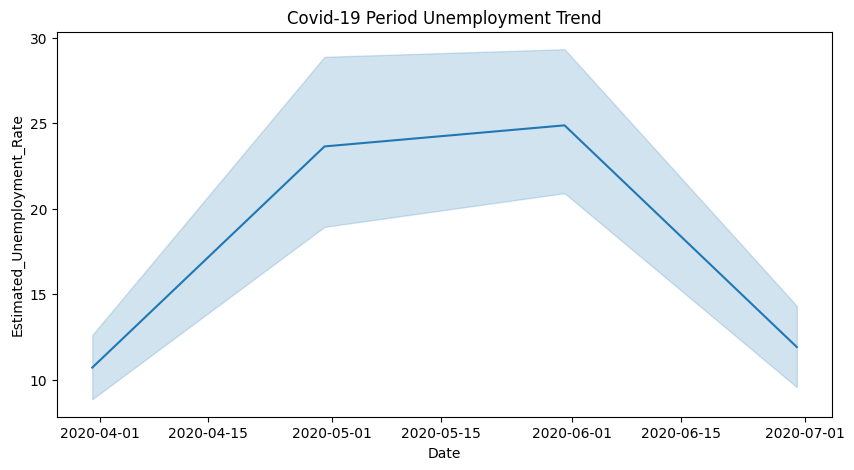

In [46]:
covid_period = df[(df['Date'] >= '2020-03-01') & (df['Date'] <= '2021-03-01')]
plt.figure(figsize=(10,5))
sns.lineplot(x='Date', y='Estimated_Unemployment_Rate', data=covid_period)
plt.title("Covid-19 Period Unemployment Trend")
plt.show()



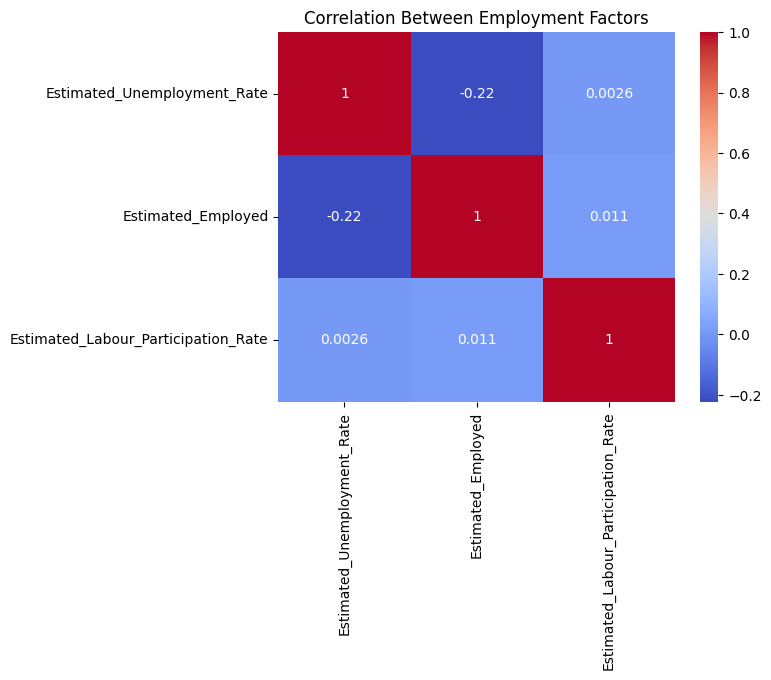

In [47]:
sns.heatmap(df[['Estimated_Unemployment_Rate', 'Estimated_Employed', 'Estimated_Labour_Participation_Rate']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Employment Factors")
plt.show()


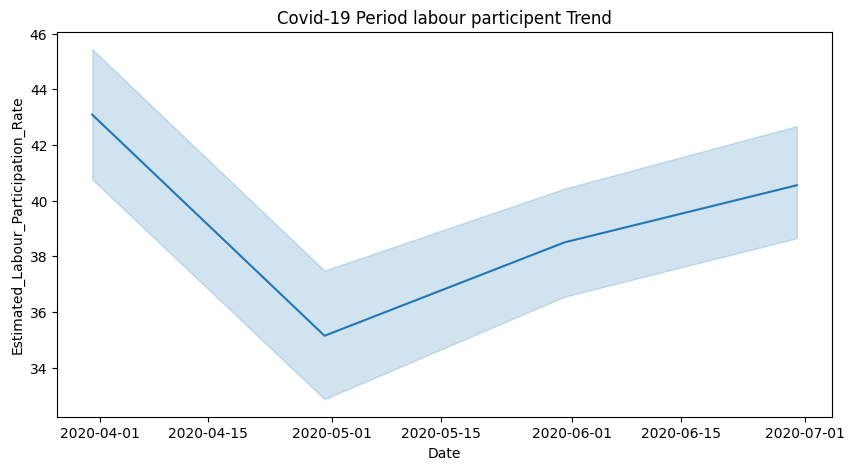

In [49]:
covid_period = df[(df['Date'] >= '2020-03-01') & (df['Date'] <= '2021-03-01')]
plt.figure(figsize=(10,5))
sns.lineplot(x='Date', y='Estimated_Labour_Participation_Rate', data=covid_period)
plt.title("Covid-19 Period labour participent Trend")
plt.show()

In [50]:
pre_covid = df[df['Date'] < '2020-03-01']['Estimated_Unemployment_Rate'].mean()
during_covid = df[df['Date'] >= '2020-03-01']['Estimated_Unemployment_Rate'].mean()

print("Pre-Covid Avg:", pre_covid)
print("During Covid Avg:", during_covid)



Pre-Covid Avg: 9.509533582089553
During Covid Avg: 17.774362745098042


/tmp/ipython-input-378090564.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_avg.index, y=region_avg.values, palette='coolwarm')


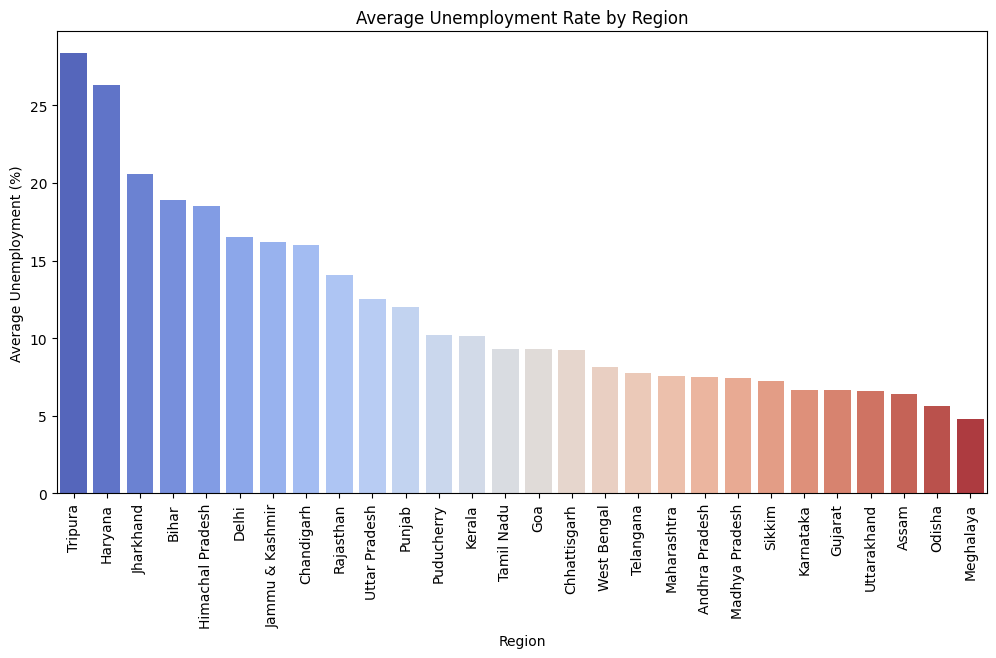

In [51]:
plt.figure(figsize=(12,6))
region_avg = df.groupby('Region')['Estimated_Unemployment_Rate'].mean().sort_values(ascending=False)
sns.barplot(x=region_avg.index, y=region_avg.values, palette='coolwarm')
plt.xticks(rotation=90)
plt.title("Average Unemployment Rate by Region")
plt.ylabel("Average Unemployment (%)")
plt.show()



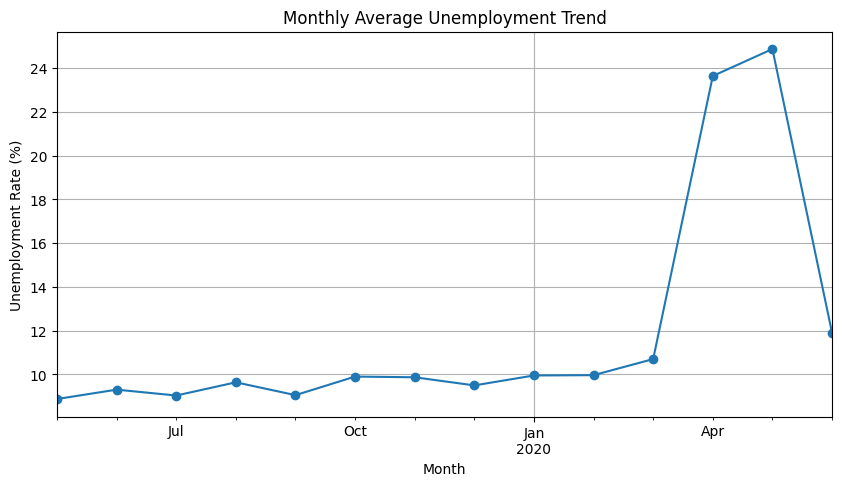

In [52]:
df['Month'] = df['Date'].dt.to_period('M')
monthly_trend = df.groupby('Month')['Estimated_Unemployment_Rate'].mean()

plt.figure(figsize=(10,5))
monthly_trend.plot(marker='o')
plt.title("Monthly Average Unemployment Trend")
plt.ylabel("Unemployment Rate (%)")
plt.xlabel("Month")
plt.grid(True)
plt.show()


/tmp/ipython-input-579181063.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Pre-Covid', 'During Covid', 'Post-Covid'], y=[pre_covid, covid, post_covid], palette='coolwarm')


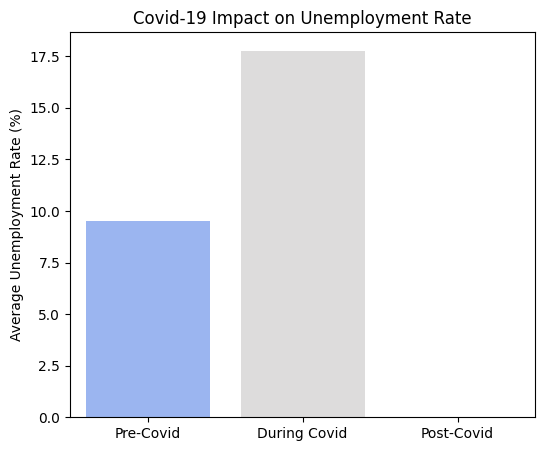

In [53]:
pre_covid = df[df['Date'] < '2020-03-01']['Estimated_Unemployment_Rate'].mean()
covid = df[(df['Date'] >= '2020-03-01') & (df['Date'] <= '2021-03-01')]['Estimated_Unemployment_Rate'].mean()
post_covid = df[df['Date'] > '2021-03-01']['Estimated_Unemployment_Rate'].mean()

plt.figure(figsize=(6,5))
sns.barplot(x=['Pre-Covid', 'During Covid', 'Post-Covid'], y=[pre_covid, covid, post_covid], palette='coolwarm')
plt.title("Covid-19 Impact on Unemployment Rate")
plt.ylabel("Average Unemployment Rate (%)")
plt.show()


In [57]:
# Define mapping of states to regions
region_map = {
    'Delhi': 'North', 'Haryana': 'North', 'Punjab': 'North', 'Uttarakhand': 'North', 'Himachal Pradesh': 'North', 'Jammu & Kashmir': 'North',
    'Tamil Nadu': 'South', 'Kerala': 'South', 'Karnataka': 'South', 'Andhra Pradesh': 'South', 'Telangana': 'South',
    'Bihar': 'East', 'Jharkhand': 'East', 'Odisha': 'East', 'West Bengal': 'East',
    'Gujarat': 'West', 'Maharashtra': 'West', 'Rajasthan': 'West', 'Goa': 'West',
    'Madhya Pradesh': 'Central', 'Chhattisgarh': 'Central',
    'Assam': 'North-East', 'Manipur': 'North-East', 'Meghalaya': 'North-East', 'Tripura': 'North-East', 'Mizoram': 'North-East'
}

# Add new column 'Zone' in dataset
df['Zone'] = df['Region'].map(region_map)


/tmp/ipython-input-1763968059.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




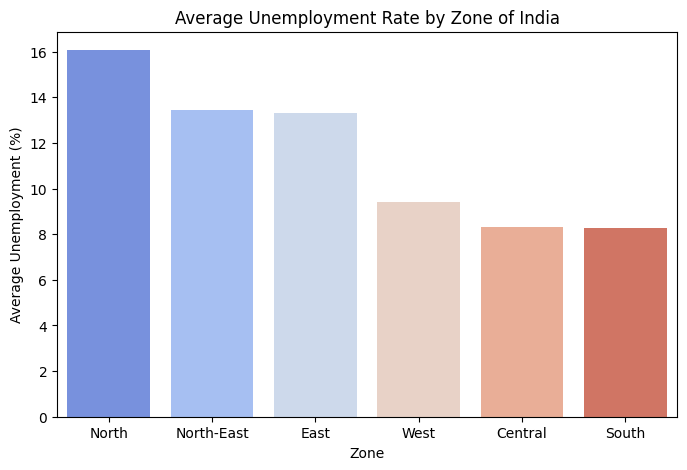

Zone
North         16.071875
North-East    13.463086
East          13.321429
West           9.392685
Central        8.323393
South          8.259857
Name: Estimated_Unemployment_Rate, dtype: float64


In [58]:
zone_avg = df.groupby('Zone')['Estimated_Unemployment_Rate'].mean().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=zone_avg.index, y=zone_avg.values, palette='coolwarm')
plt.title("Average Unemployment Rate by Zone of India")
plt.ylabel("Average Unemployment (%)")
plt.xlabel("Zone")
plt.show()

print(zone_avg)


EDA helped in understanding the patterns, trends, and relationships in the data.

Overall Trend (Line Chart)
The unemployment rate over time was plotted using a line graph.
 This showed a sharp rise in unemployment during early 2020, right when the Covid-19 lockdowns began.
After mid-2021, the rate started to decline slowly, showing signs of recovery.

Region-wise Comparison (Boxplot)
A boxplot was created to compare unemployment rates across different Indian regions.
 The plot revealed that some regions like Haryana, Jharkhand, and Rajasthan had consistently higher unemployment,
while regions like Gujarat and Maharashtra had lower and more stable rates.

Average Unemployment Rate by Region (Bar Chart)
A bar chart of average unemployment per region showed clear variation in joblessness across states.
 This visualization helped identify regions needing the most policy attention.

Monthly Trend (Line Chart)
Monthly averages showed seasonal patterns — unemployment tends to increase during certain months (like summer)
and decrease during harvest or festival seasons.

# Covid-19 Impact **Analysis**

To study the effect of Covid-19:

Data was divided into Pre-Covid, During Covid, and Post-Covid periods.

Average unemployment rates were calculated for each period.

Results showed that:

Before Covid (2019): Unemployment rate was relatively stable.

During Covid (2020): The rate increased sharply due to lockdown and job losses.

After Covid (2021 onward): The rate gradually declined, showing economic recovery.

This confirms that Covid-19 had a significant negative impact on employment in India.

# Correlation **Analysis**

A heatmap was used to examine relationships between:

Estimated Unemployment Rate

Estimated Employed

Estimated Labour Participation Rate

 The heatmap revealed:

A strong negative correlation between unemployment rate and employment —
meaning when unemployment goes up, the number of employed people goes down.

A positive correlation between employment and labour participation —
higher workforce participation generally leads to more employment.

# Key Insights & **Observations**

Unemployment spiked dramatically during the Covid-19 lockdown period (March–June 2020).

Northern and Eastern regions faced the highest unemployment rates.

Some seasonal variations were observed — certain months consistently showed higher unemployment.

Employment and labour participation are strongly interlinked indicators of economic health.

# **Conclusion**

This project successfully used Python to analyze unemployment data, explore trends, and visualize insights.
The study clearly demonstrates how Covid-19 led to a sudden increase in unemployment across India, followed by gradual recovery.
The analysis highlights the importance of data analytics in understanding real-world socio-economic challenges and
supporting evidence-based policy decisions.